## QISKit Developer Challenge

### Contest Files and Requirements:
The following files are available with the [template download](https://qx-awards.mybluemix.net/):
- **challenge_submission.py** - This is where your code should go. 
It contains a compiler_function template that you should replace with your more efficient compiler code.
- **challenge_evaluation.py** - This contains rountines to benchmark your compiler. It will be used for the judging to grade the speed of the compiler and gate cost of the circuits that are produced.  
- **circuits** folder containing random test circuits and the code to generate them.
- **layouts** folder containing coupling maps for various 5, 16 and 20 qubit topologies.

In addition, there is this jupyter notebook for testing your compiler and some helper files.

You will need version [**QISKit v0.44 or newer**](https://www.qiskit.org) and ideally a working 'local_qiskit_simulator' backend to benchmark your code. You can install both with the command `pip install qiskit` or `pip install qiskit --upgrade` on MacOSX and Linux. On Windows the 'local_qiskit_simulator' backend is not yet available and you either have to use the roughly 20x slower 'local_qasm_simulator' backend or build the simulator by yourself from [source](https://github.com/QISKit/qiskit-sdk-py/tree/master/src/cpp-simulator). The simulator for windows will become available in a future qiskit release so check back from time to time. With the 'local_qasm_simulator' backend the 16 and 20 qubit circuits may lead to a timeout error. Make sure you use small and few circuits for testing.

#### Updated on 24 January 2018:
- minor changes to `challenge_evaluation.py` to improve the reliability of the scoring.
- added a missing circuit in the circuit folder



### How to proceed:

- Install QISKit v0.44 or newer from [www.qiskit.org](www.qiskit.org) using 'pip install qiskit' or 'pip install qiskit --upgrade' and test that the 'local_qiskit_simulator' backend is present:
            from qiskit.backends import local_backends
            local_backends()
            
- If not, change to the 'local_qasm_simulator' backend in the code below.
- Write your own `compiler_function` in *challenge_submission.py* which takes an arbitrary quantum circuit in the form of a DAG (directed acyclic graph) and maps it onto a given coupling map with either 5,16 or 20 qubits. The returned circuit should have short depth (use as few gates as possible). The quantum circuits can be converted from OpenQASM format to a DAG with routines from QISKit (qasm_to_dag_circuit). The code example that is given as a reference uses the current QISKIT circuit unroller and mapper.
- Document your code and write a short description of the algorithm that you implemented in *challenge_submission.py*.
- Test your compiler by running the code below or by running the functions `evaluate` and `score` in *challenge_evaluation.py*. Note that compiling a 20 qubit random circuit with the 'local_qiskit_simulator' backend takes several minutes. This means that running e.g. the `score` function will take up to an hour on a typical laptop. With the slower 'local_qasm_simulator' this may increase significantly. If you have only the slow simulator available to you, you can use the code below and set ex_nr = 1. This will create a single random circuit for 5,16,20 qubits each. Also adjusting the argument *verbose = False* will not evaluate the circuits on the reference compiler and speed up the evaluation.
- Execution errors either in your compiler code or the qiskit compiler will be logged in the *dict* `test_circuits[name]["error"]`.
- A score > 1 means you have improved over the existing basic unroller and mapper in QISkit!
- Your code will be judged by score (10pts), speed (5pts), creativity (5pts) and documentation (5pts).
- For your contest submission we only need the file **challenge_submission.py** plus any imported packages or files that you addded to the code.
- These need to be uploaded on the [IBM Q Award Webpage](https://qx-awards.mybluemix.net/)


### Get Coding!



#### Import the compiler function and some helpers

Import your compiler function in *challenge_evaluation.py* and some helper functions that can be used to test your code.

In [1]:
# Import your solution function
from challenge_submission import compiler_function

# Import submission evaluation and scoring functions
from challenge_evaluation import evaluate, score

# Possibly useful other helper function
from challenge_evaluation import qasm_to_dag_circuit, load_coupling, get_layout

# Select the simulation backend to calculate the quantum states resulting from the circuits
# On Windows platform the C++ Simulator is not yet available with pip install
backend = 'local_qiskit_simulator'
#backend = 'local_qasm_simulator'     # uncomment this line if you are a Windows user

#### Setup the test circuits and coupling maps and evaluate compiler cost and speed

To evaluate your complier you can run a set of random example circuits with random coupling maps. For this, we load for 5, 16 and 20 qubits both circuits and coupling maps pre-calculated in the respective folders. 

In [2]:
# Load example circuits and coupling maps

ex_nr = 1 # examples to add per qubit number. maximum is 10 with the provided circuits
test_circuit_filenames = {}

for i in range(ex_nr):
    test_circuit_filenames['circuits/random%d_n5_d5.qasm' % i] = get_layout(5)
for i in range(ex_nr):
    test_circuit_filenames['circuits/random%d_n16_d16.qasm' % i] = get_layout(16)
for i in range(ex_nr):
    test_circuit_filenames['circuits/random%d_n20_d20.qasm' % i] = get_layout(20)

# store circuit, coupling map pairs in test_circuits. Circuits are in qasm form.
test_circuits = {}
for filename, cmap in test_circuit_filenames.items():
    with open(filename, 'r') as infile:
        qasm = infile.read()        
        test_circuits[filename] = {"qasm": qasm, "coupling_map": cmap}

Use `evaluate` to run the compiler and compare the resulting quantum states with the ones produced by the original circuit. It reports cost and compile time (smaller numbers are better) of the generated output circuits.
The cost for each of the basis gates `u1, u2, u3, cx, id` is:

    gate_costs = {'id': 0, 'u1': 0, 'measure': 0, 'reset': 0, 'barrier': 0,
                  'u2': 1, 'u3': 1, 'U': 1,
                  'cx': 10, 'CX': 10}
                  
Errors in one of the compilers will be reported but will not interupt the evaluation.
You can retrieve the error information using `test_circuit[circuit_name]["error"]["optimized"]`. Type `help(evaluate)` to learn more about the `evaluate` function.

In [3]:
result = evaluate(compiler_function, test_circuits, verbose=True, backend = backend)

In [4]:
result

{'circuits/random0_n16_d16.qasm': {'cost_optimized': 13607,
  'cost_original': 4608,
  'cost_reference': 13607,
  'coupling_correct_optimized': True,
  'coupling_correct_original': False,
  'coupling_correct_reference': True,
  'optimizer_time': 65.72886199999999,
  'reference_time': 66.13378900000001,
  'state_correct_optimized': True},
 'circuits/random0_n20_d20.qasm': {'cost_optimized': 38277,
  'cost_original': 7200,
  'cost_reference': 38277,
  'coupling_correct_optimized': True,
  'coupling_correct_original': False,
  'coupling_correct_reference': True,
  'optimizer_time': 203.14835399999998,
  'reference_time': 207.890725,
  'sim_time_opti': 0.1375569999999975,
  'sim_time_orig': 0.10703999999999958,
  'state_correct_optimized': True},
 'circuits/random0_n5_d5.qasm': {'cost_optimized': 399,
  'cost_original': 360,
  'cost_reference': 399,
  'coupling_correct_optimized': True,
  'coupling_correct_original': False,
  'coupling_correct_reference': True,
  'optimizer_time': 3.168335

You can retrieve the compiled circuits from the `test_circuits` dict and also inspect the permutation of the qubits and any error messages that may have been produced during compilation.

In [8]:
test_circuits['circuits/random0_n5_d5.qasm'].keys()

dict_keys(['qasm', 'coupling_map', 'dag_original', 'error', 'dag_optimized', 'dag_reference', 'perm_optimized'])

#### Determine the score and speed of your compiler ( used to judge your submission ):

To test the performance of your compiler you can use the 'score(compiler_function)' function. It returns a *score* and a *speed* value in relation to the built-in QISKit unroler and mapper code. Larger numbers are better. These two values will be used to grade your submission to the contest. Check the runtime of your code using evaluate first. Running `score` will take roughly one hour to evaluate all the circuits on a standard laptop.

In [6]:
myres = score(compiler_function, backend = backend)
print("Your compiler scored %6.5f x better \
and was %6.5f x faster than the QISKit reference compiler." % myres)

Your compiler scored 1.00000 x better and was 1.04061 x faster than the QISKit reference compiler.


#### Generate other coupling maps

In [7]:
# import some coupling map generation functions
from gencoupling import *

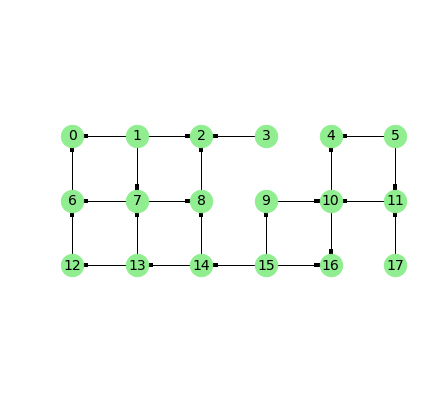

In [8]:
# generate a square coupling map with 18 qubits and nearest neighbour connectivity
# then remove 4 random links
# also try linear, circle, rect, torus, ibmqx etc.
lr = rect(6,3,order = 0.5, defects = -4)
plot_layout(lr)

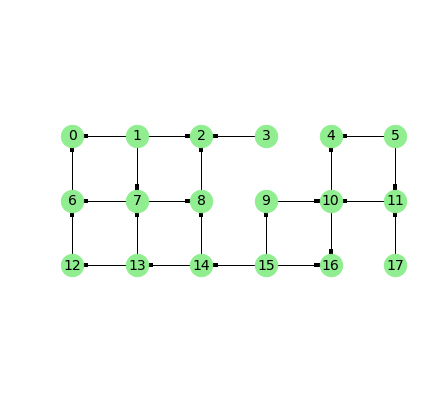

In [9]:
# save the coupling map in the layouts folder
lr["name"] = "random_rectangular_lattice_4_defects_q18"
save_coupling(lr)

# load the saved coupling by name
rr = load_coupling("random_rectangular_lattice_4_defects_q18")
rr["coupling_map"]
plot_layout(lr)

#### Make additional random circuits

You can generate more random circuits for other qubit numbers by navigating to the circuits subfolder in a terminal window and executing the command: `python RandomCircuits.py -n 17 -d 17` where `-n` specifies the *number of qubits* and `-d` the *depth* of the target circuit with random unitary two qubit gates. In order to easily extract the qubit permutation after compilation of the circuit, a final barrier gate over all qubits is needed. All qubits need to be measured after that.

In [11]:
# if your working directory is the folder with this notebook you can also use 
import os 
mydir = os.curdir
os.chdir('circuits')
!python generator.py -n 17 -d 17
os.chdir(mydir)

In [12]:
with open('random0_n17_d17.qasm', 'r') as infile:
        qasm = infile.read()
print(qasm)

OPENQASM 2.0;
include "qelib1.inc";
qreg q[17];
creg c[17];
u3(0.673413431175209,0.210555746343246,-0.485259511808214) q[11];
u3(1.24719245541480,-2.88490069778539,1.66688468060292) q[9];
cx q[9],q[11];
u1(3.00102449222932) q[11];
u3(-1.12895353762448,0.0,0.0) q[9];
cx q[11],q[9];
u3(2.19016389326362,0.0,0.0) q[9];
cx q[9],q[11];
u3(2.91405668722739,1.30261250138167,-0.327054457682679) q[11];
u3(1.64732715625200,-0.194844588304069,-2.13598642623523) q[9];
u3(2.57804272130013,3.00798682514219,-0.728822849219900) q[7];
u3(1.83362065988206,1.36888812623214,-1.45809997785534) q[16];
cx q[16],q[7];
u1(3.12634016996200) q[7];
u3(-1.91031581066810,0.0,0.0) q[16];
cx q[7],q[16];
u3(0.810879030959395,0.0,0.0) q[16];
cx q[16],q[7];
u3(2.01540006022065,-1.42675263513300,3.45435286393248) q[7];
u3(1.53483774471264,-2.10206604421160,-1.46609637339410) q[16];
u3(1.73573119091606,3.57360395075536,-2.39541740696466) q[4];
u3(0.436863916387437,-0.863170842989086,3.04120431359644) q[5];
cx q[5],q[4];
u1